In [1]:
'''
    子图

    在matplotlib中，整个图像为一个Figure对象
    在Figure对象中可以包含一个或者多个Axes对象
    每个Axes(ax)对象都是一个拥有自己坐标系统的绘图区域
    
    plt.figure, plt.subplot
'''

'\n    子图\n\n    在matplotlib中，整个图像为一个Figure对象\n    在Figure对象中可以包含一个或者多个Axes对象\n    每个Axes(ax)对象都是一个拥有自己坐标系统的绘图区域\n    \n    plt.figure, plt.subplot\n'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

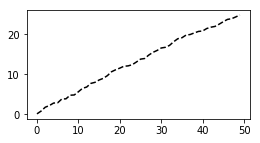

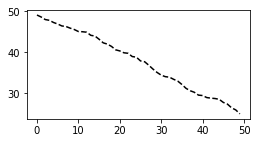

In [10]:
# plt.figure() 绘图对象
'''
    plt.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, 
        frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, **kwargs)
        num：图表序号，integer or string, optional, default: None
            如果是数字,则给图表增加序号(类似id),如果是一个字符串，则窗口标题将设置为该图的num。
        figsize：图表大小 width, height in inches. If not provided, defaults to
                :rc:`figure.figsize` = ``[6.4, 4.8]``.
'''
fig1 = plt.figure(num=1,figsize=(4,2))
plt.plot(np.random.rand(50).cumsum(),'k--')
fig2 = plt.figure(num=2,figsize=(4,2))
plt.plot(50-np.random.rand(50).cumsum(),'k--')

# 当我们调用plot时，如果设置plt.figure()，则会自动调用figure()生成一个figure, 严格的讲，是生成subplots()
plt.show()

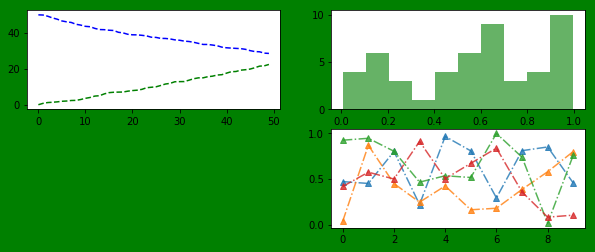

In [25]:
# 子图创建1 - 先建立子图然后填充图表

# 先创建图表figure
flg = plt.figure(figsize=(10,4),facecolor='g')

# 然后生成子图，(2,2,1)代表创建2*2的矩阵表格，然后选择第一个，顺序是从左到右从上到下
ax1 = flg.add_subplot(2,2,1) 

# 创建子图后绘制图表，会绘制到最后一个子图
plt.plot(np.random.rand(50).cumsum(),'g--')
plt.plot(50 - np.random.rand(50).cumsum(),'b--')

# 创建第二个图表
ax2 = flg.add_subplot(2,2,2)
ax2.hist(np.random.rand(50),color='g',alpha=0.6)

# 创建第四个图表
ax4 = flg.add_subplot(2,2,4)
df4 = pd.DataFrame(np.random.rand(10,4),columns=list('abcd'))
ax4.plot(df4,alpha=0.8,linestyle='-.',marker='^')
# 也可以直接在子图后用图表创建函数直接生成图表

plt.show()


fig: Figure(432x288) <class 'matplotlib.figure.Figure'>
('axes:', array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012BB2DA9240>,
      dtype=object), <class 'numpy.ndarray'>)


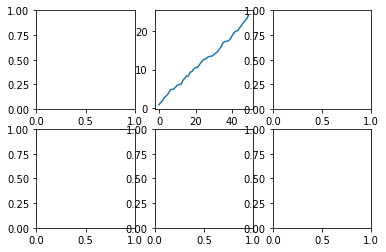

In [33]:
# 子图创建2 - 创建一个新的figure，并返回一个subplot对象的numpy数组 → plt.subplot
fig, axes = plt.subplots(2,3,figsize=(6,4))  # 2*3的ndarray 
print('fig:',fig,type(fig))
print(('axes:',axes,type(axes)))

# 选取第1行第2个子图绘图
axes[0,1].plot(pd.Series(np.random.rand(50).cumsum()))

'\n    def subplots_adjust(left=None, bottom=None, right=None, top=None,\n                        wspace=None, hspace=None):\n        """\n        Tune the subplot layout.  调整子图布局\n    \n        The parameter meanings (and suggested defaults) are::\n        \n          left  = 0.125  # the left side of the subplots of the figure\n          right = 0.9    # the right side of the subplots of the figure\n          bottom = 0.1   # the bottom of the subplots of the figure\n          top = 0.9      # the top of the subplots of the figure 图的子图的顶部\n          wspace = 0.2   # the amount of width reserved for space between subplots,\n                         expressed as a fraction of the average axis width\n                         为子图之间的空间保留的宽度量，表示为平均轴宽度的一部分\n          hspace = 0.2   # the amount of height reserved for space between subplots,\n                         # expressed as a fraction of the average axis height\n    \n        The actual defaults are controlled by the rc file\n    """

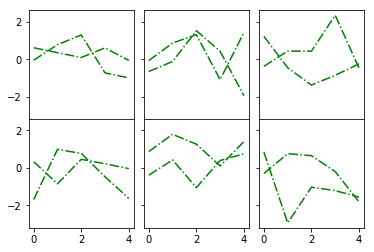

In [42]:
# plt.subplots,参数调整
# sharex,sharey：是否共享x，y刻度,默认不共享
fig,axes = plt.subplots(2,3,sharex=True,sharey=True)

for x in range(2):
    for y in range(3):
        axes[x,y].plot(pd.DataFrame(np.random.randn(5,2),columns=['A','B']),'g-.')

# subplots_adjust()调整子图布局
# wspace,hspace：用于控制宽度和高度的百分比，比如subplot之间的间距
plt.subplots_adjust(wspace=0.1,hspace=0)

'''
    def subplots_adjust(left=None, bottom=None, right=None, top=None,
                        wspace=None, hspace=None):
        """
        Tune the subplot layout.  调整子图布局
    
        The parameter meanings (and suggested defaults) are::
        
          left  = 0.125  # the left side of the subplots of the figure
          right = 0.9    # the right side of the subplots of the figure
          bottom = 0.1   # the bottom of the subplots of the figure
          top = 0.9      # the top of the subplots of the figure 图的子图的顶部
          wspace = 0.2   # the amount of width reserved for space between subplots,
                         expressed as a fraction of the average axis width
                         为子图之间的空间保留的宽度量，表示为平均轴宽度的一部分
          hspace = 0.2   # the amount of height reserved for space between subplots,
                         # expressed as a fraction of the average axis height
    
        The actual defaults are controlled by the rc file
    """
'''

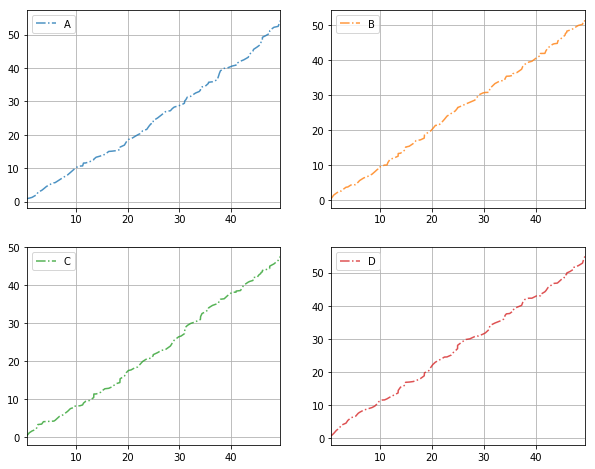

In [52]:
# 子图创建3 - 多系列图，分别绘制
ts = pd.Series(np.random.rand(100).cumsum())
df = pd.DataFrame(np.random.rand(100,4),index=ts,columns=list('ABCD')).cumsum()

# 绘图
df.plot(style='-.',alpha=0.8,grid=True,figsize=(10,8),
        subplots=True,  # subplots，是否分别绘制系列（子图）
        layout=(2,2),   # 绘制子图矩阵布局，按顺序填充
        sharex=False)
plt.show()